<center><img SRC="car.png" aling="center"/></center>

<center><h1 style="color: #00008B">Analisis Estadistico Descriptivo</h1></center>
<center><h2 style="color: #008B8B">Para venta de Autos</h2></center>
<center><h3 style="color: #8B008B">2021</h3></center>

<p style="text-aling:justify"> Este es un analisis para poder identificar las caracteristics de los autos que se venden y sus precios.

Para posterior se trabajara una prediccion con base en la regresion lineal a efectos de estimar en cuanto se puede vender mi carro, en funcion de los datos historicos de ventas.</p>

<h2 style="color: #2F4F4F">1. Carga y estandarizacion de los archivos de datos</h2>

<p> Que se hace en este apartado? </p>

<ol>
    <li>Importar las librerias que se necesitan</li>
    <li>Importar los set de datos de los CSV</li>
    <li>Revisar los encabezados de los DataFrames</li>
    <li>Unir los marcos de datos (DataFrames) </li>
</ol>


<h3 style="color: #483D8B">1.1 Importacion de librerias</h3>

In [79]:
# se realiza la importacion de las librerias necesarias para el EDA
import pandas as pd             #para manejo de dataFrames
import numpy as np              #para manejo de estructuras de datos como listas
import matplotlib as mpl        #para manejo de graficas
import matplotlib.pyplot as plt #para manejo de graficas

<h3 style="color: #483D8B">1.2 Carga de Archivos de Datos</h3>

In [80]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors", 
       "style", "wheels", "engine", "base", "length", "width", "heingt",
       "curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
       "compression", "horsepower", "peak", "City", "Higway", "price"]

dfAutos1 = pd.read_csv("autos.csv",  names=cols)
dfAutos2 = pd.read_csv("Autos 1.csv",  names=cols)

In [81]:
dfAutos1.shape

(197, 26)

In [82]:
dfAutos1.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [83]:
dfAutos1.tail(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


<h3 style="color: #483D8B">1.3 Revisar Encabezados</h3>

In [84]:
dfAutos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

In [85]:
dfAutos1.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [86]:
dfAutos1.describe()

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [87]:
dfAutos1.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [88]:
dfAutos1.shape

(197, 26)

In [89]:
dfAutos2.shape

(29, 26)

In [90]:
print (197 + 29)

226


<h3 style="color: #483D8B">1.4 Union de Archivos de Datos</h3>

In [91]:
unionArchivos = [dfAutos1, dfAutos2]
dfSetAuto = pd.concat(unionArchivos)
dfSetAuto.shape

(226, 26)

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

<h2 style="color: #2F4F4F">2. Manejo de Valores Faltantes o Perdidos</h2>

<p> Que se hace en este apartado? </p>

<ol>
    <li>Identificar como se muestran los vaores faltantes y estandarizarlos al NaN</li>
    <li>Contar la cantidad de valores NaN faltantes por variable</li>
    <li>Analisis de imputacion de valores numericos con la media</li>
    <li>Analisis de imputacion de valures String con el dato mas frecuente </li>
    <li>Eliminar filas con valores faltantes</li>
</ol>

<h3 style="color: #483D8B">2.1 Identificacion de valores faltantes o perdidos y estandarizacion</h3>

In [92]:
dfSetAuto

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
25,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
26,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
27,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


In [93]:
dfSetAuto.replace("?", np.nan, inplace = True)

In [94]:
dfSetAuto.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3 style="color: #483D8B">2.2 Contar los NaN por Variable</h3>

In [95]:
valoresPerdidos = dfSetAuto.isnull()
valoresPerdidos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True     

<h3 style="color: #483D8B">2.3 Imputar valores numericos con la media</h3>

In [97]:
avg_norm = dfSetAuto["normalized"].astype("float").mean(axis=0)
print ("media del normalized: ", avg_norm)

media del normalized:  122.28333333333333


In [98]:
dfSetAuto["normalized"].replace(np.nan, 122, inplace=True)
dfSetAuto.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


pa_revisar = dfSetAuto.loc[:, 'doors'] == ""
df_rev = dfSetAuto.loc[pa_revisar]
df_rev.head()

<h3 style="color: #483D8B">2.4 Imputar valores STRING con el mas frecuente</h3>

In [99]:
dfSetAuto['doors'].value_counts().idxmax()

'four'

In [100]:
dfSetAuto["doors"].replace(np.nan, 'four', inplace=True)
dfSetAuto.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [101]:
valoresPerdidos = dfSetAuto.isnull()
valoresPerdidos.head(5)
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True       4
Name: stroke, dtype: i

<h3 style="color: #483D8B">2.5 Eliminar filas con valores faltantes o perdidos</h3>

In [102]:
dfSetAuto.dropna(subset = ["price"], axis = 0, inplace = True)
dfSetAuto.reset_index(drop=True, inplace = True)

In [103]:
valoresPerdidos = dfSetAuto.isnull()
valoresPerdidos.head(5)
for column in valoresPerdidos.columns.values.tolist():
    print(column)
    print(valoresPerdidos[column].value_counts())
    print("")

symboling
False    222
Name: symboling, dtype: int64

normalized
False    222
Name: normalized, dtype: int64

make
False    222
Name: make, dtype: int64

fuel
False    222
Name: fuel, dtype: int64

aspiration
False    222
Name: aspiration, dtype: int64

doors
False    222
Name: doors, dtype: int64

style
False    222
Name: style, dtype: int64

wheels
False    222
Name: wheels, dtype: int64

engine
False    222
Name: engine, dtype: int64

base
False    222
Name: base, dtype: int64

length
False    222
Name: length, dtype: int64

width
False    222
Name: width, dtype: int64

heingt
False    222
Name: heingt, dtype: int64

curb
False    222
Name: curb, dtype: int64

engineType
False    222
Name: engineType, dtype: int64

Cylinders
False    222
Name: Cylinders, dtype: int64

engine-size
False    222
Name: engine-size, dtype: int64

system
False    222
Name: system, dtype: int64

bore
False    218
True       4
Name: bore, dtype: int64

stroke
False    218
True       4
Name: stroke, dtype: i

<h2 style="color: #FF1493">3. Estandarizacion de los datos</h2>

<p> Que se hace en este apartado? </p>

<ol>
    <li>Se verifica el dominio de la variable y se ajusta, si es necesario</li>
    <li>Se convierten los valores en función de su interpretación </li>
    <li>Se normalizan los datos para que los valores distintos queden entre 0 y 1</li>
    <li>Binning</li>
</ol>

<h3 style="color: #B22222">3.1 Verificacion del dominio de variables</h3>

In [104]:
dfSetAuto.head(2)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [105]:
dfSetAuto.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [106]:
dfSetAuto[["bore", "stroke", "peak"]] = dfSetAuto[["bore", "stroke", "peak"]].astype("float")
dfSetAuto[["normalized"]] = dfSetAuto[["normalized"]].astype("int")
dfSetAuto[["price"]] = dfSetAuto[["price"]].astype("float")

In [107]:
dfSetAuto.dtypes

symboling        int64
normalized       int64
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak           float64
City             int64
Higway           int64
price          float64
dtype: object

<h3 style="color: #B22222">3.2 Estandarizacion de valores</h3>

In [108]:
dfSetAuto.head()

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [109]:
dfSetAuto["city-L/100km"] = 235/dfSetAuto["City"]
dfSetAuto.head()

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<h3 style="color: #B22222">3.3 Normalizacion de datos</h3>

In [110]:
dfSetAuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     222 non-null    int64  
 1   normalized    222 non-null    int64  
 2   make          222 non-null    object 
 3   fuel          222 non-null    object 
 4   aspiration    222 non-null    object 
 5   doors         222 non-null    object 
 6   style         222 non-null    object 
 7   wheels        222 non-null    object 
 8   engine        222 non-null    object 
 9   base          222 non-null    float64
 10  length        222 non-null    float64
 11  width         222 non-null    float64
 12  heingt        222 non-null    float64
 13  curb          222 non-null    int64  
 14  engineType    222 non-null    object 
 15  Cylinders     222 non-null    object 
 16  engine-size   222 non-null    int64  
 17  system        222 non-null    object 
 18  bore          218 non-null    

In [111]:
dfTemp = dfSetAuto[["length", 'width', "heingt"]]

In [112]:
dfTemp.head()

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [113]:
dfSetAuto["length"] = dfSetAuto["length"]/dfSetAuto["length"].max()
dfSetAuto["width"]  = dfSetAuto["width"]/dfSetAuto["width"].max()
dfSetAuto["heingt"] = dfSetAuto["heingt"]/dfSetAuto["heingt"].max()

In [114]:
dfTemp = dfSetAuto[["length", 'width', "heingt"]]
dfTemp.head()

,length,width,heingt
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h3 style="color: #B22222">3.4 Binning</h3>

In [124]:
dfSetAuto.head(1)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,bajo


In [125]:
dfSetAuto.dtypes

symboling             int64
normalized            int64
make                 object
fuel                 object
aspiration           object
doors                object
style                object
wheels               object
engine               object
base                float64
length              float64
width               float64
heingt              float64
curb                  int64
engineType           object
Cylinders            object
engine-size           int64
system               object
bore                float64
stroke              float64
compression         float64
horsepower            int64
peak                float64
City                  int64
Higway                int64
price               float64
city-L/100km        float64
horsepower-bins    category
dtype: object

In [126]:
dfSetAuto.dropna(subset = ["horsepower"], axis = 0, inplace = True)

In [127]:
dfSetAuto[["horsepower"]] = dfSetAuto[["horsepower"]].astype("int", copy=True)

In [128]:
dfSetAuto.dtypes

symboling             int64
normalized            int64
make                 object
fuel                 object
aspiration           object
doors                object
style                object
wheels               object
engine               object
base                float64
length              float64
width               float64
heingt              float64
curb                  int64
engineType           object
Cylinders            object
engine-size           int64
system               object
bore                float64
stroke              float64
compression         float64
horsepower            int64
peak                float64
City                  int64
Higway                int64
price               float64
city-L/100km        float64
horsepower-bins    category
dtype: object

Text(0.5, 1.0, 'horsepower bins')

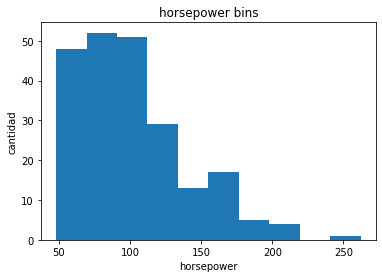

In [129]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfSetAuto["horsepower"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("horsepower bins")

In [130]:
bins = np.linspace(min(dfSetAuto["horsepower"]), max(dfSetAuto["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [131]:
group_names = ["bajo", "medio", "alto"]
dfSetAuto["horsepower-bins"] = pd.cut(dfSetAuto["horsepower"], bins, labels=group_names, include_lowest=True)
dfSetAuto[["horsepower", "horsepower-bins"]].head(3)

,horsepower,horsepower-bins
0,111,bajo
1,111,bajo
2,154,medio


In [132]:
dfSetAuto["horsepower-bins"].value_counts()

bajo     172
medio     43
alto       5
Name: horsepower-bins, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

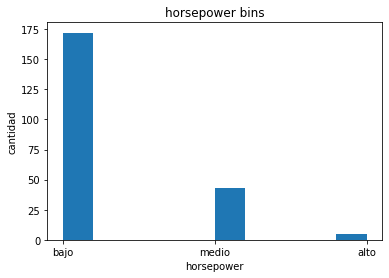

In [133]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(dfSetAuto["horsepower-bins"])

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("horsepower bins")

In [134]:
dfSetAuto

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,3.01,3.40,23.0,68,4500.0,33,38,13845.0,7.121212,bajo
218,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,3.19,3.40,9.0,88,5500.0,25,31,12290.0,9.400000,bajo
219,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,3.78,3.15,9.5,114,5400.0,23,28,12940.0,10.217391,bajo
220,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,3.78,3.15,9.5,114,5400.0,23,28,13415.0,10.217391,bajo
